# Predicting Alzheimer disease using machine learning

this notebook looks into using various Python-based machine learning and data science libraries in an attempt to build machine learning model capable of predicting whether or not someone has Alzheimer disease based on their medical attributes

we're going to take the following approach

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modeling
    4. Building a Predictive System
    
## 1. Problem Definition

In a statement
> Given clinical parameters about a patient, can we predict whether or not they have Alzheimer disease

## 2. Data

the original data come from Alzheimer Features For Analysis on Kaggle
URL: https://www.kaggle.com/code/hyunseokc/detecting-early-alzheimer-s/notebook?fbclid=IwAR1Uscvx557m0PYmz9C1GXq59nIkCYLQHvtGOR6EaWHT3UaasC3jkJBUJ_k

## 3.Evaluation 
> if we can reach 95% accuracy at prediction whether or not a patient has Alzheimer disease during the proof of concept, we'll pursue the project

## 4.features

*Create data dictionary *

> Group --> Class
* 72 of the subjects were grouped as 'Nondemented' throughout the study.
* 64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
* 14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

> Age --> Age


> EDUC --> Years of Education

> SES --> Socioeconomic Status / 1-5

> MMSE --> Mini Mental State Examination : is a widely used test of cognitive function among the elderly; it includes tests of orientation, attention, memory, ...

> CDR --> Clinical Dementia Rating

<img src="Images/CDR.png" />

> eTIV --> Estimated total intracranial volume

> nWBV --> Normalize Whole Brain Volume

> ASF --> Atlas Scaling Factor

# Preparing the tools

we're going to use pandas , Matplotlib , Numpy and some of scikitLearn librairy for data analysis and manipulation

    

In [82]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# the diffrent models (just to choose the best one)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Model Evaluations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,  GridSearchCV

# Load DATA

In [25]:
# Read data
alzheimer_data = pd.read_csv('Alzheimer.csv')
# Show data 
alzheimer_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [26]:
# print the first 5 rows of DataFrame
alzheimer_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [27]:
# print last 5 rows of the DataFrame

alzheimer_data.tail()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,Nondemented,F,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [28]:
# Number of rows and columns in the dataset

alzheimer_data.shape

(373, 10)

In [29]:
# getting some info about the data

alzheimer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


### Make sure it's all numeric


In [30]:
# view types of the data
alzheimer_data.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

* we need to change it like the following:

> {"Demented": 1, "Nondemented": 0, "Converted": 2}

> {"F": 0, "M": 1}

In [31]:
alzheimer_data['Group'] = alzheimer_data['Group'].replace(['Demented', 'Nondemented', 'Converted'],[1,0, 2])
alzheimer_data['M/F'] = alzheimer_data['M/F'].replace(['F', 'M'],[0,1])

In [32]:
alzheimer_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Missing values
1. Fill them with some value (also khnow as imputation) .
2. Remove the samples with missing data alltogether

In [33]:
# see data with missing values (NaN)
alzheimer_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [34]:
# show how much missing values there are
alzheimer_data.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [35]:
### Fill missing data with Pandas

alzheimer_data["SES"].fillna(alzheimer_data["SES"].mean(), inplace= True)
alzheimer_data["MMSE"].fillna(alzheimer_data["MMSE"].mean(), inplace= True)

In [36]:
# Check our dataframe again
alzheimer_data.isna().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [37]:
len(alzheimer_data)

373

In [38]:
# show data
alzheimer_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [39]:
alzheimer_data['Group'].value_counts()

0    190
1    146
2     37
Name: Group, dtype: int64

<AxesSubplot:>

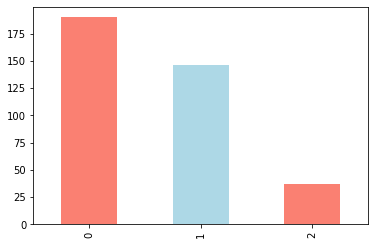

In [40]:
alzheimer_data['Group'].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

# Some reading about the features

## Alzheimer disease Frequency according to Sex

In [41]:
# Compare Group column with sex column
pd.crosstab(alzheimer_data.Group, alzheimer_data['M/F'])

M/F,0,1
Group,,
0,129,61
1,60,86
2,24,13


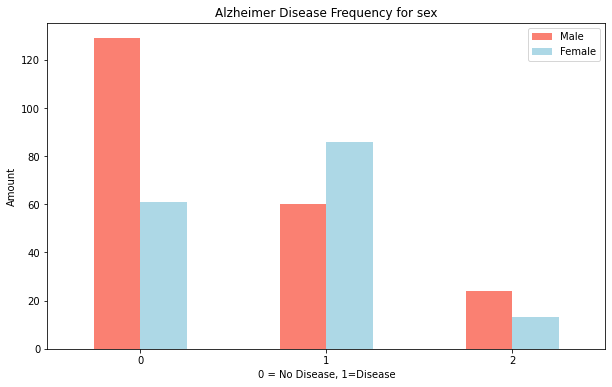

In [42]:
# Create a plot of crosstab
pd.crosstab(alzheimer_data.Group, alzheimer_data['M/F']).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])


plt.title("Alzheimer Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Male", "Female"])
plt.xticks(rotation=0);

## Alzheimer disease Frequency according to Age

In [43]:
alzheimer_data.Age.value_counts()

73    26
75    22
78    21
80    20
81    18
71    18
82    17
76    16
77    16
68    14
84    13
69    13
83    12
70    12
74    12
79    11
72    11
88    10
66    10
86    10
85     9
89     7
67     6
65     6
87     6
90     5
62     4
91     4
92     4
61     4
63     3
64     3
93     3
60     2
94     1
95     1
96     1
97     1
98     1
Name: Age, dtype: int64

In [44]:
# Compare Group column with age column
pd.crosstab(alzheimer_data.Group, alzheimer_data.Age)

Age,60,61,62,63,64,65,66,67,68,69,...,89,90,91,92,93,94,95,96,97,98
Group,,,,,,,,,,,,,,,,,,,,,
0,2,3,2,3,2,4,4,2,6,7,...,5,3,3,2,3,1,1,0,1,0
1,0,1,2,0,1,1,6,2,7,5,...,1,2,0,1,0,0,0,1,0,1
2,0,0,0,0,0,1,0,2,1,1,...,1,0,1,1,0,0,0,0,0,0


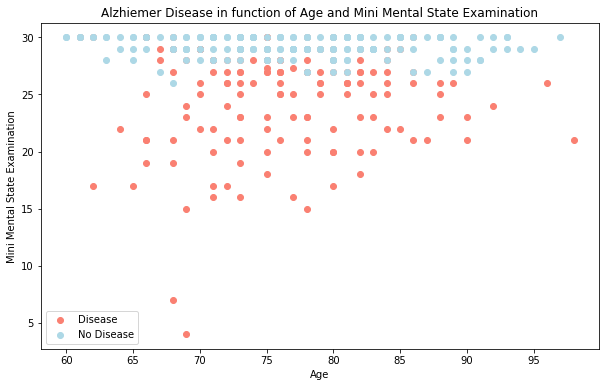

In [45]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(alzheimer_data.Age[alzheimer_data.Group ==1],
           alzheimer_data.MMSE[alzheimer_data.Group==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(alzheimer_data.Age[alzheimer_data.Group ==0],
           alzheimer_data.MMSE[alzheimer_data.Group==0],
           c="lightblue")

# Add some helpful info
plt.title("Alzhiemer Disease in function of Age and Mini Mental State Examination")
plt.xlabel("Age")
plt.ylabel("Mini Mental State Examination")
plt.legend(["Disease", "No Disease"])

In [46]:
# Make a correlation matrix
alzheimer_data.corr()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.143918,0.049267,-0.100606,-0.053290,-0.339906,0.572518,-0.056693,-0.258093,0.042848
M/F,0.143918,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,0.049267,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.100606,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.053290,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.339906,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.572518,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.056693,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.258093,-0.249618,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,0.042848,-0.561647,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


(10.5, -0.5)

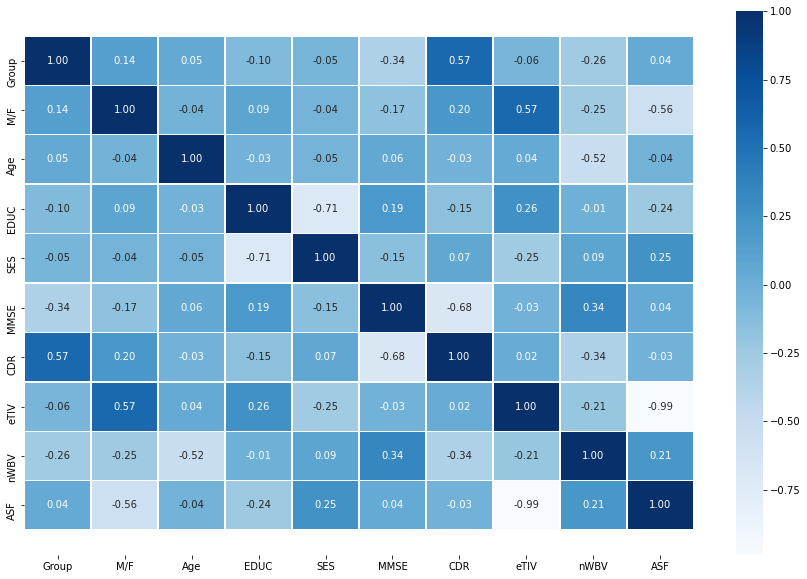

In [47]:
# Let's make our correlation matrix a little prettier
corr_matrix = alzheimer_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+ 0.5, top-0.5)

# Spliting the Features and group

In [48]:
X = alzheimer_data.drop(columns='Group', axis=1)
Y = alzheimer_data['Group']

In [49]:
X

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [50]:
Y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

# Splitting the data into Training data & Test Data

In [51]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)
# test_size: mean how much percentage of the data you want to test

In [52]:
X_train.shape, X_test.shape

((298, 9), (75, 9))

In [53]:
Y_train.shape, Y_test.shape

((298,), (75,))

In [54]:
X.shape, Y.shape

((373, 9), (373,))

Now we've got our data split into training and test sets, it's time to build a machine learning model

we'll train if(find the patterns) on the training set

And we'll test it (use the patterns) on the test set

We're going to choose one the 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [55]:
# Put models in a dictionnary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep models scores
    model_scores = {}
    # loop through Models
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6933333333333334, 'KNN': 0.64, 'Random Forest': 0.92}


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

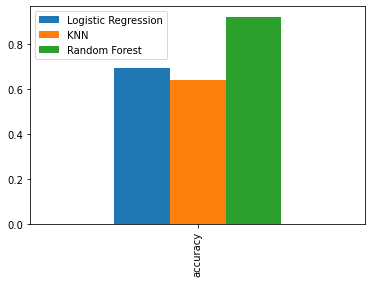

In [58]:
print(fit_and_score(models, X_train, X_test, Y_train, Y_test))
model_compare = pd.DataFrame(fit_and_score(models, X_train, X_test, Y_train, Y_test), index=["accuracy"])
model_compare.plot.bar()

=> from the plot up we can decide that Random Forest is the best model for this dataframe

# Model training

> Random Forest Classifier

In [59]:
model = RandomForestClassifier()

In [60]:
# Training the RandomForestClassifier model with Training data
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

> Accurancy Score

In [61]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [62]:
print(f'Accuracy on Training data : {training_data_accuracy}')

Accuracy on Training data : 1.0


In [63]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [64]:
print(f'Accuracy on Test data : {test_data_accuracy}')

Accuracy on Test data : 0.92


In [65]:
# Make predictions with tuned model
y_preds = model.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [66]:
Y_test

291    0
234    1
368    1
237    1
148    0
      ..
60     1
104    0
245    2
340    0
7      0
Name: Group, Length: 75, dtype: int64

what is ROC curve?
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

In [67]:
# View accuracy score
accuracy_score(Y_test, y_preds)

0.92

=> This model has an accuracy score of 92% on the test data. That seems pretty impressive, but accuracy is not a great measure of classifier performance when the classes are imbalanced

## Confusion matrix

A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused. 

In [68]:
matrix = confusion_matrix(Y_test, y_preds)
matrix

array([[37,  0,  1],
       [ 0, 29,  0],
       [ 2,  3,  3]], dtype=int64)

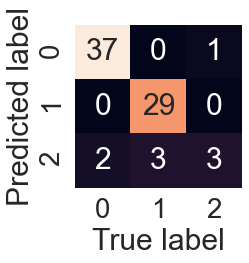

In [69]:
sns.set(font_scale = 2.5)

def plot_conf_mat(Y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax= plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test, y_preds)

Now it’s easy to see that our classifier struggled at predicting
## Classification report
To get even more insight into model performance, we should examine other metrics like precision, recall, and F1 score

In [70]:
# View the classification report for test data and predictions
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.91      1.00      0.95        29
           2       0.75      0.38      0.50         8

    accuracy                           0.92        75
   macro avg       0.87      0.78      0.80        75
weighted avg       0.91      0.92      0.91        75



Precision is high, meaning that the model was careful to avoid labeling things. 

### Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_scores()'

In [71]:
# Cross-validated accuracy
cv_acc = cross_val_score(model,X,Y, cv=5, scoring="accuracy").mean()
cv_acc

0.8981621621621623

In [72]:
# Cross-validated precision
cv_precision = cross_val_score(model,
                               X,
                               Y, 
                               cv=5, 
                               scoring="precision_micro"
                               ).mean()

cv_precision

0.8981981981981981

In [73]:
# Cross-validated recall
cv_recall = cross_val_score(model, X, Y, scoring="recall_micro", cv = 5).mean()
cv_recall

0.8927927927927927

In [74]:
# Cross-validated f1-score
cv_f1 = cross_val_score(model,
                       X,
                       Y,
                       cv=5,
                       scoring="f1_micro").mean()
cv_f1

0.9008648648648648

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

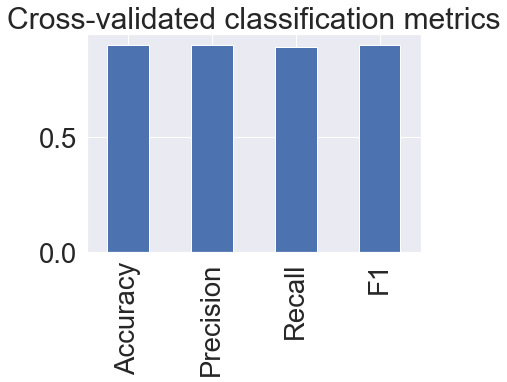

In [75]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

## Feature importance

Feature importance is another as asking, " which featurs contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandomForestClassifier model...

In [76]:
# Match coef's of feature to columns
feature_dict = dict(zip(X.columns, list(model.feature_importances_)))
feature_dict

{'M/F': 0.025287861613371026,
 'Age': 0.06478238387756388,
 'EDUC': 0.05476226672031665,
 'SES': 0.03987394052408015,
 'MMSE': 0.18083242806260694,
 'CDR': 0.4158892598498471,
 'eTIV': 0.0659142415990116,
 'nWBV': 0.0848113201064162,
 'ASF': 0.06784629764678644}

<AxesSubplot:title={'center':'Feature Importance'}>

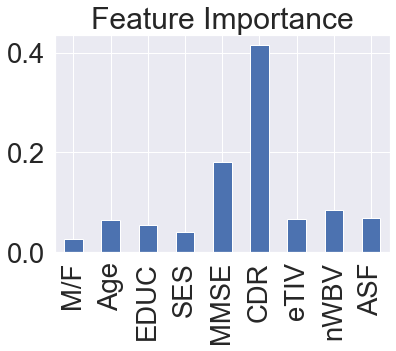

In [77]:
# Visualize feature importance
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title="Feature Importance", legend=False)

# Example: Building a Predictive System

In [78]:
input_data = (0,69,12,10,29,0,1365,0.783,1.286)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicitng for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 0):
    print('The Person does not have a Alzheimer disease')
elif prediction[0] == 1:
    print('This Person has Alzheimer disease')
else:
    print('This Person start to have Alzheimer')

The Person does not have a Alzheimer disease


In [83]:
from flask import Flask,request,jsonify
import pickle
pickle.dump(model,open('model.pkl','wb'))